In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file
dfStore = pd.read_csv('../data/store.csv')
test_df = pd.read_csv('../data/test.csv')


In [3]:
train_df=pd.read_csv('../data/train.csv')

C:\Users\huawei\AppData\Local\Temp\ipykernel_9672\3163751236.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df=pd.read_csv('../data/train.csv')


In [4]:
# Get the number of rows and columns
num_rows = dfStore.shape[0]
num_cols = dfStore.shape[1]

# Print the number of rows and columns
print("Store Data")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Store Data
Number of Rows: 1115
Number of Columns: 10


In [5]:
# Get the number of rows and columns
num_rows = test_df.shape[0]
num_cols = test_df.shape[1]

# Print the number of rows and columns
print("Test Data")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Test Data
Number of Rows: 41088
Number of Columns: 8


In [6]:
# Get the number of rows and columns
num_rows = train_df.shape[0]
num_cols = train_df.shape[1]

# Print the number of rows and columns
print("Train Data")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Train Data
Number of Rows: 1017209
Number of Columns: 9


StoreCSv

In [7]:
# Remove rows with NaN values
dfStore = dfStore.dropna()

# Create a pipeline for numeric columns
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Create a pipeline for non-numeric columns
non_numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [8]:
# Identify numeric and non-numeric columns
numeric_cols = dfStore.select_dtypes(include='number').columns
non_numeric_cols = dfStore.select_dtypes(exclude='number').columns

# Apply pipelines to numeric columns
dfStore[numeric_cols] = numeric_pipeline.fit_transform(dfStore[numeric_cols])

# Apply pipelines to non-numeric columns
dfStore[non_numeric_cols] = non_numeric_pipeline.fit_transform(dfStore[non_numeric_cols])

In [9]:
num_rows = dfStore.shape[0]
num_cols = dfStore.shape[1]
print("Store Data")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Store Data
Number of Rows: 365
Number of Columns: 10


TestCSV

In [10]:
# Custom transformer to filter rows based on Store column
class FilterStore(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[X['Store'].isin(dfStore['Store'])]

# Custom transformer to filter rows based on Open column
class FilterOpen(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[X['Open'].isin([0, 1])]

# Custom transformer to filter rows based on StateHoliday column
class FilterStateHoliday(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[X['StateHoliday'].isin(['a', 'b', 'c', 0])]

# Custom transformer to remove rows with NaN values
class RemoveNaN(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.dropna()

In [11]:
# Create a pipeline to perform the tasks
pipeline = Pipeline([
    ('filter_store', FilterStore()),
    ('filter_open', FilterOpen()),
    ('filter_state_holiday', FilterStateHoliday()),
    ('remove_nan', RemoveNaN())
])

In [12]:
# Apply the pipeline to the test_data
filtered_data = pipeline.fit_transform(test_df)

Train

In [13]:
# Apply the pipeline to the Train Data
filtered_data = pipeline.fit_transform(train_df)

In [14]:
num_rows = train_df.shape[0]
num_cols = train_df.shape[1]
print("Store Data")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Store Data
Number of Rows: 1017209
Number of Columns: 9


●	Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

they are slightly different 

In the training set, approximately 38.2% of the records have a promotion (Promo=1), while around 61.8% do not have a promotion (Promo=0).

In the test set, approximately 39.6% of the records have a promotion (Promo=1), while around 60.4% do not have a promotion (Promo=0).

Although the distributions are not exactly the same, they are relatively similar, with both sets having a higher proportion of records without promotions (Promo=0).

In [20]:
# Check distribution of promotions in the training set
train_promo_distribution = train_df['Promo'].value_counts(normalize=True)
print("Training set promotion distribution:")
print(train_promo_distribution)



Training set promotion distribution:
Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64


In [21]:
# Check distribution of promotions in the test set
test_promo_distribution = test_df['Promo'].value_counts(normalize=True)
print("\nTest set promotion distribution:")
print(test_promo_distribution)


Test set promotion distribution:
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


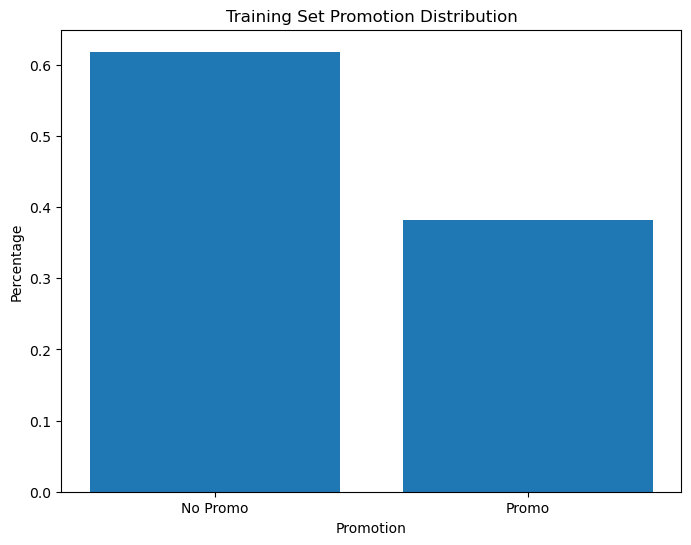

In [18]:
# Plotting the distribution of promotions in the training set
plt.figure(figsize=(8, 6))
plt.bar(train_promo_distribution.index, train_promo_distribution.values)
plt.title("Training Set Promotion Distribution")
plt.xlabel("Promotion")
plt.ylabel("Percentage")
plt.xticks(train_promo_distribution.index, ['No Promo', 'Promo'])
plt.show()

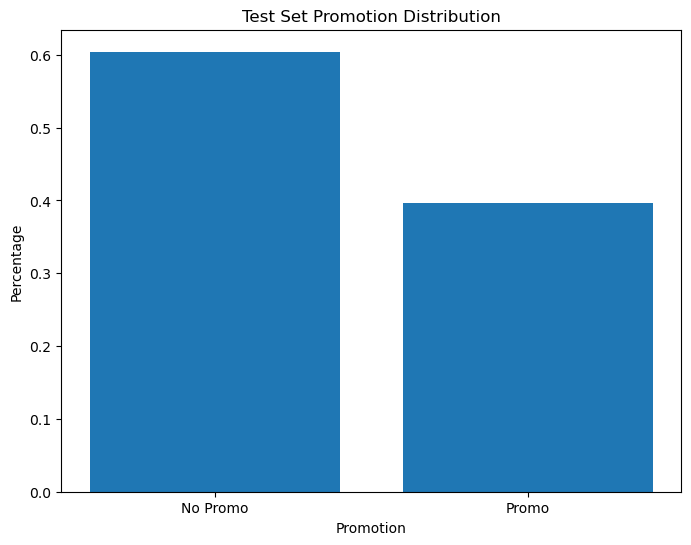

In [19]:
# Plotting the distribution of promotions in the test set
plt.figure(figsize=(8, 6))
plt.bar(test_promo_distribution.index, test_promo_distribution.values)
plt.title("Test Set Promotion Distribution")
plt.xlabel("Promotion")
plt.ylabel("Percentage")
plt.xticks(test_promo_distribution.index, ['No Promo', 'Promo'])
plt.show()

Check & compare sales behavior before, during, and after holidays

Using Train CSV

In [22]:
# Convert the 'Date' column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [23]:
# Create a new column 'HolidayPeriod'
train_df['HolidayPeriod'] = 'Non-Holiday'

In [24]:
# Identify the sales behavior before, during, and after holidays
train_df.loc[train_df['StateHoliday'] != '0', 'HolidayPeriod'] = 'During Holiday'
train_df.loc[(train_df['StateHoliday'] == '0') & (train_df['StateHoliday'].shift(1) != '0'), 'HolidayPeriod'] = 'Before Holiday'
train_df.loc[(train_df['StateHoliday'] == '0') & (train_df['StateHoliday'].shift(-1) != '0'), 'HolidayPeriod'] = 'After Holiday'


In [25]:
# Calculate the average sales for each holiday period
average_sales_by_period = train_df.groupby('HolidayPeriod')['Sales'].mean()


HolidayPeriod
After Holiday     6970.543073
Before Holiday    6918.088683
During Holiday    4684.874237
Non-Holiday       5975.683664
Name: Sales, dtype: float64


In [26]:
# Print the average sales for each holiday period
print(average_sales_by_period)

HolidayPeriod
After Holiday     6970.543073
Before Holiday    6918.088683
During Holiday    4684.874237
Non-Holiday       5975.683664
Name: Sales, dtype: float64


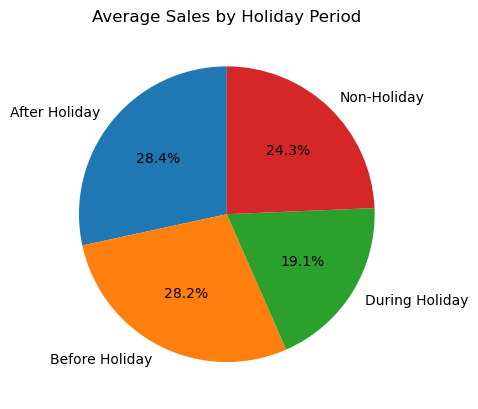

In [31]:
# Data for the pie chart
labels = average_sales_by_period.index
sizes = average_sales_by_period.values

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Adding a title
plt.title("Average Sales by Holiday Period")

# Display the chart
plt.show()

●	Find out any seasonal (Christmas, Easter, etc) purchase behaviors,